In [113]:
import pandas as pd
import numpy as np
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import sentence_transformers
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
import scipy.sparse
import sys
sys.path.insert(1, '/Users/piyush/Desktop/dsml_Portfolio/podcast/final_push')
from config import PODCASTS_DATABASE_PATH_RAW, USER_REVIEWS_DATABASE_PATH_RAW, PODCASTS_DATABASE_PATH_PROCESSED, USER_REVIEWS_DATABASE_PATH_PROCESSED
from preprocessing import get_preprocessed_text
from sklearn.metrics.pairwise import cosine_similarity, manhattan_distances, euclidean_distances
from tqdm import tqdm


# Loading data 
df_podcasts = pd.read_csv(PODCASTS_DATABASE_PATH_RAW,header=None)
df_users = pd.read_csv(USER_REVIEWS_DATABASE_PATH_RAW,header=None)

columns_pod = ['id','name','url','studio','category','episode_count','avg_rating','total_ratings','description']
columns_users = ['id','podcasts_id','username','review_title','review','rating','date']

df_podcasts.columns = columns_pod
df_users.columns = columns_users
df_users = df_users.drop('id', axis=1)

df_podcasts['tags'] =  df_podcasts['description'] + ' ' + df_podcasts['category']
df_podcasts['tags_parsed'] =  df_podcasts['tags'].apply(lambda x: get_preprocessed_text(x)) 
tags_parsed_list = list(df_podcasts['tags_parsed'])

model_tfidf = TfidfVectorizer(max_features=50,stop_words='english', analyzer='word', ngram_range=(1,3))
tfidf_embeddings_matrix = model_tfidf.fit_transform(tags_parsed_list)

In [114]:
tfidf_embeddings = tfidf_embeddings_matrix.todense()

In [115]:
df_embeddings = pd.DataFrame(tfidf_embeddings)

In [116]:
df_embeddings

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.355726,0.0,...,0.000000,0.000000,0.443158,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.633120,0.000000,0.484544,0.0,...,0.000000,0.000000,0.603636,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
2,0.0,0.0,0.346912,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.325342,0.000000,0.0,0.0,0.000000,0.304897,0.0,0.270154,0.000000
3,0.0,0.0,0.000000,0.0,0.000000,0.0,0.691621,0.000000,0.000000,0.0,...,0.000000,0.000000,0.659413,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
4,0.0,0.0,0.000000,0.0,0.615551,0.0,0.339668,0.000000,0.000000,0.0,...,0.329736,0.000000,0.323850,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.371467
2359,0.0,0.0,0.000000,0.0,0.000000,0.0,0.723758,0.000000,0.000000,0.0,...,0.000000,0.000000,0.690054,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
2360,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.510195,0.000000,0.0,0.0,0.549038,0.000000,0.0,0.000000,0.000000
2361,0.0,0.0,0.000000,0.0,0.000000,0.0,0.382119,0.000000,0.000000,0.0,...,0.000000,0.000000,0.728649,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000


In [117]:
df_embeddings['id'] = df_podcasts['id']
df_embeddings['name'] = df_podcasts['name']
df_embeddings['category'] = df_podcasts['category']


df_embeddings.insert(0, 'id', df_embeddings.pop("id"))
df_embeddings.insert(1, 'name', df_embeddings.pop("name"))
df_embeddings.insert(2, 'category', df_embeddings.pop("category"))

In [118]:
df_embeddings

,id,name,category,0,1,2,3,4,5,6,...,40,41,42,43,44,45,46,47,48,49
0,id1647910854,Rachel Maddow Presents: Ultra,News,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.443158,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
1,id1464919521,Dateline NBC,True Crime,0.0,0.0,0.000000,0.0,0.000000,0.0,0.633120,...,0.000000,0.000000,0.603636,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
2,id1200361736,The Daily,News,0.0,0.0,0.346912,0.0,0.000000,0.0,0.000000,...,0.000000,0.325342,0.000000,0.0,0.0,0.000000,0.304897,0.0,0.270154,0.000000
3,id1322200189,Crime Junkie,True Crime,0.0,0.0,0.000000,0.0,0.000000,0.0,0.691621,...,0.000000,0.000000,0.659413,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
4,id1379959217,Morbid,Comedy,0.0,0.0,0.000000,0.0,0.615551,0.0,0.339668,...,0.329736,0.000000,0.323850,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,id1582491051,Strawberry Spring,Fiction,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.371467
2359,id1493193473,Intent: The Tex McIver Case,True Crime,0.0,0.0,0.000000,0.0,0.000000,0.0,0.723758,...,0.000000,0.000000,0.690054,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
2360,id1518866635,Request Pending,News,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.510195,0.000000,0.0,0.0,0.549038,0.000000,0.0,0.000000,0.000000
2361,id1551162705,The Opportunist,True Crime,0.0,0.0,0.000000,0.0,0.000000,0.0,0.382119,...,0.000000,0.000000,0.728649,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000


In [119]:
df_embeddings['category'].value_counts()

Society & Culture          250
News                       247
Comedy                     184
TV & Film                  175
Health & Fitness           171
Business                   148
Sports                     121
Arts                       121
Religion & Spirituality    120
Education                  117
True Crime                 114
Fiction                    106
History                     99
Kids & Family               98
Leisure                     79
Science                     73
Technology                  71
Music                       39
Government                  30
Name: category, dtype: int64

In [120]:
df_embeddings

,id,name,category,0,1,2,3,4,5,6,...,40,41,42,43,44,45,46,47,48,49
0,id1647910854,Rachel Maddow Presents: Ultra,News,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.443158,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
1,id1464919521,Dateline NBC,True Crime,0.0,0.0,0.000000,0.0,0.000000,0.0,0.633120,...,0.000000,0.000000,0.603636,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
2,id1200361736,The Daily,News,0.0,0.0,0.346912,0.0,0.000000,0.0,0.000000,...,0.000000,0.325342,0.000000,0.0,0.0,0.000000,0.304897,0.0,0.270154,0.000000
3,id1322200189,Crime Junkie,True Crime,0.0,0.0,0.000000,0.0,0.000000,0.0,0.691621,...,0.000000,0.000000,0.659413,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
4,id1379959217,Morbid,Comedy,0.0,0.0,0.000000,0.0,0.615551,0.0,0.339668,...,0.329736,0.000000,0.323850,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,id1582491051,Strawberry Spring,Fiction,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.371467
2359,id1493193473,Intent: The Tex McIver Case,True Crime,0.0,0.0,0.000000,0.0,0.000000,0.0,0.723758,...,0.000000,0.000000,0.690054,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
2360,id1518866635,Request Pending,News,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.510195,0.000000,0.0,0.0,0.549038,0.000000,0.0,0.000000,0.000000
2361,id1551162705,The Opportunist,True Crime,0.0,0.0,0.000000,0.0,0.000000,0.0,0.382119,...,0.000000,0.000000,0.728649,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000


In [121]:
sports_embeddings_df = df_embeddings[df_embeddings.category=='Sports']

pca = PCA(n_components=2)
sports_embeddings_pcs = pca.fit_transform(sports_embeddings_df[sports_embeddings_df.columns[3:]])

In [122]:
pca.explained_variance_ratio_


array([0.12438758, 0.067735  ])

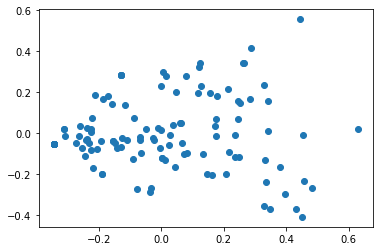

In [123]:
plt.scatter(sports_embeddings_pcs[:,0],sports_embeddings_pcs[:,1])

In [124]:
def get_cosine_sim(df, row1, row2):
    ep1 = df[df.columns[4:]].iloc[row1]
    ep2 = df[df.columns[4:]].iloc[row2]
    return cosine_similarity(ep1.values.reshape(1,-1), ep2.values.reshape(1,-1))

In [125]:
cosine_sims = np.zeros((len(sports_embeddings_df), len(sports_embeddings_df)))
for i in tqdm(range(len(sports_embeddings_df))):
    for j in range(len(sports_embeddings_df)):
        cosine_sims[i,j] = get_cosine_sim(sports_embeddings_df, i, j)

100%|█████████████████████████████████████████| 121/121 [00:07<00:00, 16.71it/s]


In [126]:
cosine_sims

array([[1.        , 0.62796621, 0.75569196, ..., 0.72884452, 0.50088471,
        0.48124304],
       [0.62796621, 1.        , 0.60259822, ..., 0.52346572, 0.38606764,
        0.3346548 ],
       [0.75569196, 0.60259822, 1.        , ..., 0.52375906, 0.43222435,
        0.42523793],
       ...,
       [0.72884452, 0.52346572, 0.52375906, ..., 1.        , 0.45528022,
        0.40236668],
       [0.50088471, 0.38606764, 0.43222435, ..., 0.45528022, 1.        ,
        0.4520406 ],
       [0.48124304, 0.3346548 , 0.42523793, ..., 0.40236668, 0.4520406 ,
        1.        ]])

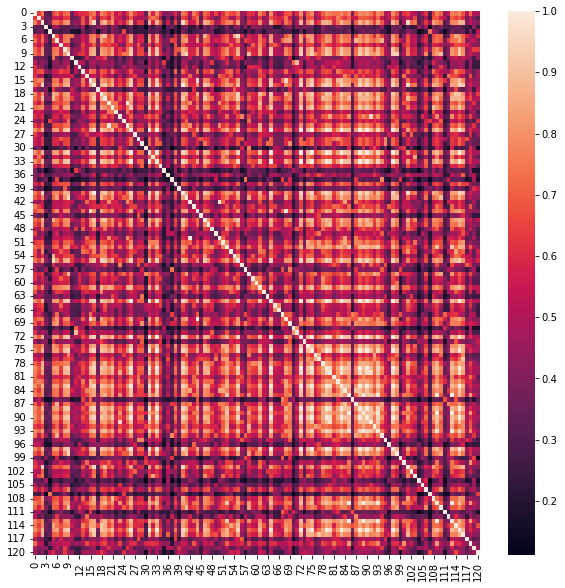

In [127]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cosine_sims)
plt.show()

In [128]:
sample_size = 200
random_minilm_df = df_embeddings.sample(sample_size, random_state=100)
random_cosine_sims = np.zeros((sample_size,sample_size))

for i in tqdm(range(len(random_minilm_df))):
    for j in range(len(random_minilm_df)):
        random_cosine_sims[i,j] = get_cosine_sim(random_minilm_df, i, j)

100%|█████████████████████████████████████████| 200/200 [00:19<00:00, 10.02it/s]


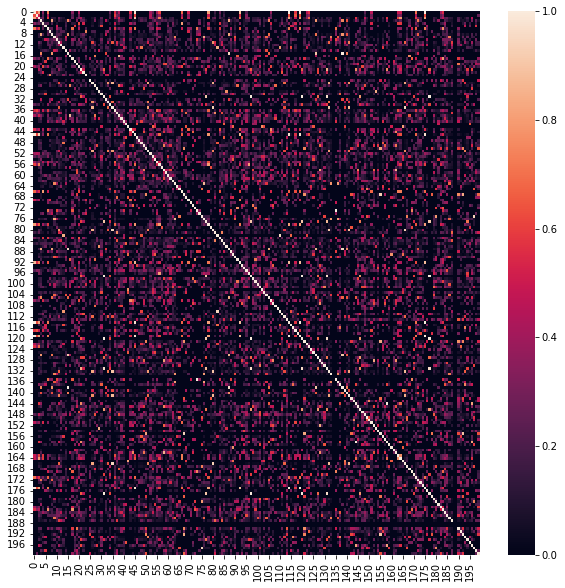

In [129]:
plt.figure(figsize=(10,10))
sns.heatmap(random_cosine_sims)
plt.show()

In [130]:
two_mix_df = df_embeddings[df_embeddings.category.isin(['Arts','Sports'])]
two_mix_df = two_mix_df.sample(200)
two_mix_df.sort_values('category',inplace=True)

In [131]:
two_mix_df

,id,name,category,0,1,2,3,4,5,6,...,40,41,42,43,44,45,46,47,48,49
2163,id1543038352,The Quilter on Fire Podcast,Arts,0.675463,0.0,0.321821,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.250614,0.000000
1990,id1123488172,The Art History Babes,Arts,0.941439,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000
2004,id429857721,The Great Detectives Present Sherlock Holmes (...,Arts,0.745647,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.666341,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000
1887,id73330616,The Treatment,Arts,0.756676,0.0,0.000000,0.0,0.0,0.341207,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.280746,0.000000
1806,id279188498,Slate Culture,Arts,0.550454,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,id1277969212,Barstool Pick Em,Sports,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.40546,0.446203,0.000000,0.000000
1559,id1530818415,One of These Years: a podcast about the Detroi...,Sports,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000
1718,id1124566025,She Explores,Sports,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000
1552,id1644216301,Big Head Bets,Sports,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.549433


In [132]:
two_mix_cosine_sims = np.zeros((len(two_mix_df), len(two_mix_df)))
for i in tqdm(range(len(two_mix_df))):
    for j in range(len(two_mix_df)):
        two_mix_cosine_sims[i,j] = get_cosine_sim(two_mix_df, i, j)


100%|█████████████████████████████████████████| 200/200 [00:20<00:00,  9.91it/s]


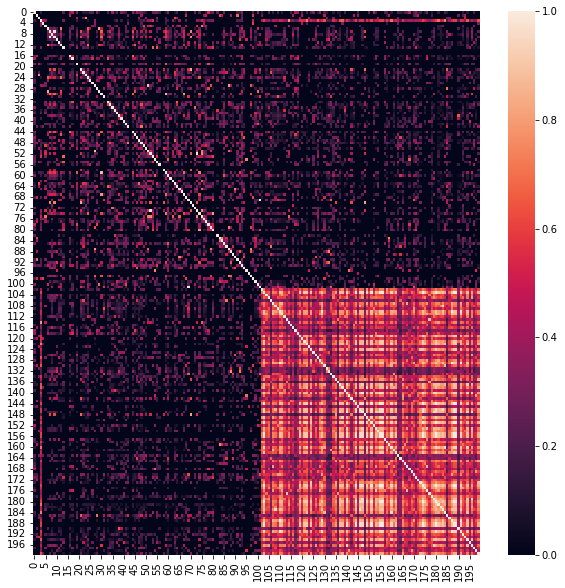

In [133]:
plt.figure(figsize=(10,10))
sns.heatmap(two_mix_cosine_sims)
plt.show()

# pairwise 


In [144]:
sample_size = 10
sampled_categories_df = df_embeddings.groupby('category').apply(lambda x: x.sample(sample_size))

In [145]:
# within-category similarities
self_similarities = {}

for category in tqdm(sampled_categories_df.category.unique()):
    category_df = sampled_categories_df.loc[category]
    category_self_similarities = np.zeros((sample_size, sample_size))
    for i in range(len(category_df)):
        for j in range(len(category_df)):
            category_self_similarities[i,j] = get_cosine_sim(category_df, i, j)
    upper_tri_selfsims = np.triu(category_self_similarities, k=1)
    upper_tri_selfsims = upper_tri_selfsims[upper_tri_selfsims>0]
    self_similarities[category] = upper_tri_selfsims

100%|███████████████████████████████████████████| 19/19 [00:00<00:00, 21.02it/s]


In [146]:
import itertools

category_pair_selfsims = {}

for category_pair in itertools.combinations(sampled_categories_df.category.unique(), 2):
    paired_category_df = sampled_categories_df[sampled_categories_df.category.isin(category_pair)]
    category_pair_self_similarities = np.zeros((sample_size*2, sample_size*2))
    for i in tqdm(range(len(paired_category_df))):
        for j in range(len(paired_category_df)):
            category_pair_self_similarities[i,j] = get_cosine_sim(paired_category_df, i, j)
    category_pair_selfsims[category_pair] = category_pair_self_similarities

100%|███████████████████████████████████████████| 20/20 [00:00<00:00, 93.08it/s]


100%|███████████████████████████████████████████| 20/20 [00:00<00:00, 99.75it/s]


In [147]:
np.save('categorypair_sim_matrices.npy',category_pair_selfsims)


In [148]:
def get_selfsim_diffsim(sim_matrix_dict, category1, category2, sample_size):
    '''
    Takes in the similarity matrix of two different categories and returns the within-category and between-category similarities
    '''
    sim_matrix = sim_matrix_dict[category1, category2]
    
    triu_idx_selfsim = np.triu_indices(sample_size, k=1)
    triu_idx_diffsim = np.triu_indices(sample_size)
    
    cat1_selfsim = np.triu(sim_matrix[:sample_size, :sample_size], k=1)
    cat2_selfsim = np.triu(sim_matrix[sample_size:, sample_size:], k=1)
    
    cat1_selfsim = cat1_selfsim[triu_idx_selfsim]
    cat2_selfsim = cat2_selfsim[triu_idx_selfsim]
    
    cat1_cat2_diffsim = np.triu(sim_matrix[sample_size:, :sample_size])
    cat1_cat2_diffsim = cat1_cat2_diffsim[triu_idx_diffsim]
    
    return {category1:cat1_selfsim, category2:cat2_selfsim, (category1,category2):cat1_cat2_diffsim}

In [149]:
from scipy.stats import ttest_ind

ttest_comparisons_tstat = np.zeros((len(sampled_categories_df.category.unique()), len(sampled_categories_df.category.unique())))
ttest_comparisons_pval = np.zeros((len(sampled_categories_df.category.unique()), len(sampled_categories_df.category.unique())))

for i, category1 in enumerate(sampled_categories_df.category.unique()): 
    for j, category2 in enumerate(sampled_categories_df.category.unique()):
        if i == j:
            ttest_comparisons_tstat[i,j] = 0
            ttest_comparisons_pval[i,j] = 1
        else:
            ordered_categories = tuple(sorted([category1, category2]))
            self_diff_sims = get_selfsim_diffsim(category_pair_selfsims, ordered_categories[0], ordered_categories[1], sample_size)
            ttest_result = ttest_ind(self_diff_sims[ordered_categories], self_diff_sims[category1], equal_var=False)# alternative='less')
            ttest_comparisons_tstat[i,j] = ttest_result.statistic
            ttest_comparisons_pval[i,j] = ttest_result.pvalue

In [150]:
from matplotlib.colors import from_levels_and_colors


colors_tstat = sns.color_palette('BuPu', 4)
levels_tstat = [-10,0,10]
cmap_tstat, norm_tstat = from_levels_and_colors(levels_tstat, colors_tstat, extend='both')

colors_pval = sns.color_palette('BuPu',3)
levels_pval = [0,0.05,1]
cmap_pval, norm_pval = from_levels_and_colors(levels_pval, colors_pval, extend='max')

In [151]:
ttest_comparisons_tstat.min()

-37.81846318494491

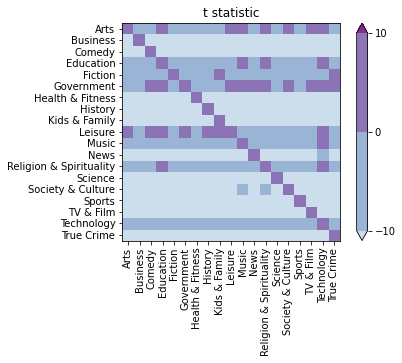

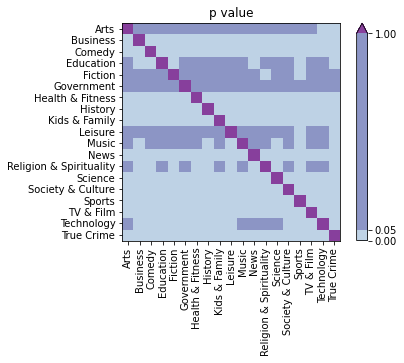

In [152]:
fig, ax = plt.subplots()
im = ax.imshow(ttest_comparisons_tstat, cmap=cmap_tstat, norm=norm_tstat)
ax.set_xticks(range(len(sampled_categories_df.category.unique())))
ax.set_xticklabels(sampled_categories_df.category.unique(), rotation=90)
ax.set_yticks(range(len(sampled_categories_df.category.unique())))
ax.set_yticklabels(sampled_categories_df.category.unique())
fig.colorbar(im,cmap=cmap_tstat, spacing='proportional')
plt.title('t statistic')
plt.show()

fig, ax = plt.subplots()
im = ax.imshow(ttest_comparisons_pval, cmap=cmap_pval, norm=norm_pval)
plt.xticks(range(len(sampled_categories_df.category.unique())),labels=sampled_categories_df.category.unique(), rotation=90)
plt.yticks(range(len(sampled_categories_df.category.unique())),labels=sampled_categories_df.category.unique())
fig.colorbar(im, cmap=cmap_pval, spacing='proportional')
plt.title('p value')
plt.show()

In [153]:
print('Proportion of ordered category pairs where within-category cosine similarity > between-category cosine similarity:')
# print(f'{np.sum(ttest_comparisons_pval < .05)/ttest_comparisons_tstat.flatten().shape[0]:.3f}')

upper_tri_pvals = ttest_comparisons_pval[np.triu_indices(ttest_comparisons_pval.shape[0], k=1)].flatten()
lower_tri_pvals = ttest_comparisons_pval[np.tril_indices(ttest_comparisons_pval.shape[0], k=-1)].flatten()

np.sum(np.concatenate([upper_tri_pvals < .05, lower_tri_pvals < .05]))/np.concatenate([upper_tri_pvals < .05, lower_tri_pvals < .05]).shape[0]

Proportion of ordered category pairs where within-category cosine similarity > between-category cosine similarity:


0.6988304093567251

In [154]:
tags_list

NameError: name 'tags_list' is not defined

In [157]:
tags_parsed_list[0].split()

['sitting',
 'member',
 'congress',
 'aiding',
 'abetting',
 'plot',
 'overthrow',
 'government',
 'insurrectionist',
 'criminally',
 'charged',
 'plotting',
 'end',
 'american',
 'democracy',
 'good',
 'justice',
 'department',
 'prosecutor',
 'crushing',
 'political',
 'pressure',
 'rachel',
 'maddow',
 'present',
 'ultra',
 'allbutforgotten',
 'true',
 'story',
 'good',
 'oldfashioned',
 'american',
 'extremism',
 'getting',
 'supercharged',
 'proximity',
 'power',
 'extremist',
 'elected',
 'official',
 'get',
 'caught',
 'plotting',
 'america',
 'violent',
 'ultra',
 'right',
 'story',
 'length',
 'go',
 'cover',
 'track',
 'follow',
 'join',
 'rachel',
 'maddow',
 'first',
 'two',
 'episode',
 'october',
 '10th',
 'news']

In [158]:
unique(tags_parsed_list[0].split())

NameError: name 'unique' is not defined

In [159]:
from collections import Counter
 
# Function to get unique values
 
 
def unique(list1):
 
    # Print directly by using * symbol
    print(*Counter(list1))
 
 
# driver code
list1 = [10, 20, 10, 30, 40, 40]
print("the unique values from 1st list is")
unique(list1)
 

the unique values from 1st list is
10 20 30 40


In [163]:
 Counter(tags_parsed_list[0].split())

Counter({'sitting': 1,
         'member': 1,
         'congress': 1,
         'aiding': 1,
         'abetting': 1,
         'plot': 1,
         'overthrow': 1,
         'government': 1,
         'insurrectionist': 1,
         'criminally': 1,
         'charged': 1,
         'plotting': 2,
         'end': 1,
         'american': 2,
         'democracy': 1,
         'good': 2,
         'justice': 1,
         'department': 1,
         'prosecutor': 1,
         'crushing': 1,
         'political': 1,
         'pressure': 1,
         'rachel': 2,
         'maddow': 2,
         'present': 1,
         'ultra': 2,
         'allbutforgotten': 1,
         'true': 1,
         'story': 2,
         'oldfashioned': 1,
         'extremism': 1,
         'getting': 1,
         'supercharged': 1,
         'proximity': 1,
         'power': 1,
         'extremist': 1,
         'elected': 1,
         'official': 1,
         'get': 1,
         'caught': 1,
         'america': 1,
         'violent': 1,
     

In [181]:
uni_wor_count = []

for i in tags_parsed_list:
    uni_wor_count.append(np.unique(i.split()).shape[0]  )

In [183]:
np.array(uni_wor_count).mean()

30.507829030892932

In [192]:
np.array(uni_wor_count)

array([55, 13, 22, ..., 12, 36, 25])

In [166]:
np.unique(tags_parsed_list[0].split())

array(['10th', 'abetting', 'aiding', 'allbutforgotten', 'america',
       'american', 'caught', 'charged', 'congress', 'cover', 'criminally',
       'crushing', 'democracy', 'department', 'elected', 'end', 'episode',
       'extremism', 'extremist', 'first', 'follow', 'get', 'getting',
       'go', 'good', 'government', 'insurrectionist', 'join', 'justice',
       'length', 'maddow', 'member', 'news', 'october', 'official',
       'oldfashioned', 'overthrow', 'plot', 'plotting', 'political',
       'power', 'present', 'pressure', 'prosecutor', 'proximity',
       'rachel', 'right', 'sitting', 'story', 'supercharged', 'track',
       'true', 'two', 'ultra', 'violent'], dtype='<U15')

In [179]:
np.unique(tags_parsed_list[0].split()).shape

(55,)

In [176]:
np.unique(   np.array(  tags_parsed_list[39].split()  )    ).shape

(16,)

In [185]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()


print(X.shape)

(4, 9)


In [189]:
X.todense()[0].shape

(1, 9)

In [191]:
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)